# 서울시 자치구 서대문구에서 치킨집이 가장 많은 동은 어디인가?

## 자료 출처
- 데이터 다운로드 : LOCALDATA 공공데이터
- https://www.localdata.kr/

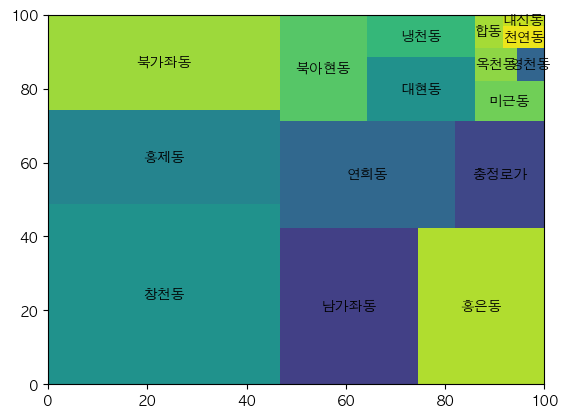

## 패키지 설정

In [1]:
# 기본 패키지

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# matplotlib 한글 세팅

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 데이터 가져오기

In [3]:
data = pd.read_csv('./서울특별시_일반음식점.csv',
                  encoding='cp949',
                  low_memory=False)

## 데이터 확인

In [5]:
data.head(2)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자        472915 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     472915 non-null  int64  
 8   영업상태명        472915 non-null  object 
 9   상세영업상태코드     472915 non-null  int64  
 10  상세영업상태명      472915 non-null  object 
 11  폐업일자         348707 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        327325 non-null  object 
 16  소재지면적        439015 non-null  object 
 17  소재지우편번호      472670 non-null  float64
 18  소재지전체주소      472678 non-

## 목표 정의

- 문제 : 서울시 자치구 서대문구에서 치킨집이 가장 많은 동은 어디인가?
- 분석 항목 확인 :
  1. 음식점 이면서, 치킨과 관련된 항목을 취급해야 함
  2. 현재 영업중 이어야 함  
  3. 서대문구에 위치해야 함

## 데이터 가공

### 1. 음식점이면서, 치킨과 관련된 항목을 취급해야 함

#### Actions
* Column을 보았을 때, 1)업태구분명 2)위생업태명 으로 판단 가능해 보임
* 1)업태구분명 2)위생업태명의 values 확인
* 동일한 데이터로 판단하여, 위생업태명 데이터로 판단
* 위생업태명에서 '음식점이면서, 치킨과 관련된' 항목은 :
    - 통닭(치킨)
    - 호프/통닭
* 유효성 검사 : 조건 인덱싱 (Boolean Indexing) 을 사용하여 위생업태명 중 '통닭', '치킨' 이 포함된 업태명 반환

#### Result
* 위생업태명에서 {'통닭(치킨)', '호프/통닭'} 두 keywords 통하여 치킨집 데이터 추출

In [7]:
# 1) 업태구분명 데이터 확인
set(data.업태구분명.values)

{'193959.150482967',
 nan,
 '간이주점',
 '감성주점',
 '경양식',
 '기타',
 '기타 휴게음식점',
 '김밥(도시락)',
 '까페',
 '냉면집',
 '다방',
 '라이브카페',
 '룸살롱',
 '복어취급',
 '분식',
 '뷔페식',
 '식육(숯불구이)',
 '식품등 수입판매업',
 '식품소분업',
 '외국음식전문점(인도,태국등)',
 '이동조리',
 '일반조리판매',
 '일식',
 '전통찻집',
 '정종/대포집/소주방',
 '제과점영업',
 '중국식',
 '출장조리',
 '커피숍',
 '키즈카페',
 '탕류(보신용)',
 '통닭(치킨)',
 '패밀리레스트랑',
 '패스트푸드',
 '한식',
 '호프/통닭',
 '횟집'}

In [8]:
# 2) 위생업태명 데이터 확인
set(data.위생업태명.values)

{nan,
 '간이주점',
 '감성주점',
 '경양식',
 '기타',
 '기타 휴게음식점',
 '김밥(도시락)',
 '까페',
 '냉면집',
 '다방',
 '라이브카페',
 '룸살롱',
 '복어취급',
 '분식',
 '뷔페식',
 '식육(숯불구이)',
 '식품등 수입판매업',
 '식품소분업',
 '외국음식전문점(인도,태국등)',
 '이동조리',
 '일반조리판매',
 '일식',
 '전통찻집',
 '정종/대포집/소주방',
 '제과점영업',
 '중국식',
 '출장조리',
 '커피숍',
 '키즈카페',
 '탕류(보신용)',
 '통닭(치킨)',
 '패밀리레스트랑',
 '패스트푸드',
 '한식',
 '호프/통닭',
 '횟집'}

In [9]:
# 조건 인덱싱 (Boolean Indexing) 을 사용하여 위생업태명 중 '통닭', '치킨' 이 포함된 업태명 반환
set(data.위생업태명[data.위생업태명.str.contains('통닭|치킨', na=False)])

{'통닭(치킨)', '호프/통닭'}

### 2. 현재 영업중이어야 함 

#### Actions
* Column을 보았을 때, '영업상태명' 으로 판단 가능해 보임
* '영업상태명'의 values 확인

#### Result
* 영업상태명이 '영업/정상' 키워드로 되어있는 데이터 추출

In [10]:
set(data.영업상태명.values)

{'영업/정상', '폐업'}

### 3. '치킨' & '영업중'인 데이터 추출

#### Actions
* 아래 두 조건 만족하여 data_fin 에 저장
  - 위생업태명에서 {'통닭(치킨)', '호프/통닭'} 두 키워드 통하여 치킨집 데이터 추출
  - 영업상태명이 '영업/정상' 키워드로 되어있는 영업중 데이터 추출
 
#### Results
- data_fin = '치킨' & '영업중' 추출한 데이터
- 총 13,110 개의 음식점이 해당됨

In [4]:
data_fin = data[(data.위생업태명.isin(['통닭(치킨)', '호프/통닭'])) & (data.영업상태명=='영업/정상')]
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13110 entries, 30 to 124203
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           13110 non-null  int64  
 1   개방서비스명       13110 non-null  object 
 2   개방서비스아이디     13110 non-null  object 
 3   개방자치단체코드     13110 non-null  int64  
 4   관리번호         13110 non-null  object 
 5   인허가일자        13110 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     13110 non-null  int64  
 8   영업상태명        13110 non-null  object 
 9   상세영업상태코드     13110 non-null  int64  
 10  상세영업상태명      13110 non-null  object 
 11  폐업일자         0 non-null      float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        6536 non-null   object 
 16  소재지면적        12677 non-null  object 
 17  소재지우편번호      13103 non-null  float64
 18  소재지전체주소      13103 non-null  object 
 19  도로명전체주소

3-2. Result
* data_fin = '치킨' & '영업중' 추출한 데이터
* 총 13,110 개의 음식점이 해당됨

### 4. 서대문구에 위치해야 함

#### Actions

* Column을 보았을 때, '소재지전체주소' 로 판단 가능해 보임
* '소재지전체주소'의 values 확인
* data_fin 데이터에 3가지 조건 컬럼 구성하여 저장
* data_fin 에서 서대문구 data 만 추출
* data_seo 로 새로 저장

#### Results
* data_seo = 서대문구에 위치한 현재 영업중인 치킨집 데이터
* 400개의 음식점 존재

In [5]:
data_fin = data_fin[['소재지전체주소', '위생업태명', '영업상태명']]
data_fin.head()

,소재지전체주소,위생업태명,영업상태명
30,서울특별시 은평구 갈현동 400-9번지 (지하1층),호프/통닭,영업/정상
43,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,호프/통닭,영업/정상
44,서울특별시 중구 필동2가 32-24번지 1층,호프/통닭,영업/정상
66,서울특별시 종로구 당주동 128-17번지 (지상1층),호프/통닭,영업/정상
67,서울특별시 서초구 우면동 59번지 105호,호프/통닭,영업/정상


In [13]:
# 위 데이터 위생업태명에 '호프/통닭' 만 표시되어 있어 유효성 검사
set(data_fin.위생업태명)

{'통닭(치킨)', '호프/통닭'}

In [6]:
res = data_fin.소재지전체주소.str.contains('서대문구', na=False)

In [7]:
data_seo = data_fin[res]
data_seo.head()

,소재지전체주소,위생업태명,영업상태명
178,서울특별시 서대문구 창천동 33-25번지,통닭(치킨),영업/정상
698,서울특별시 서대문구 홍제동 459 현대종합상가,호프/통닭,영업/정상
724,서울특별시 서대문구 남가좌동 347-20번지,호프/통닭,영업/정상
1200,서울특별시 서대문구 연희동 131-1번지 사러가쇼핑,호프/통닭,영업/정상
1405,서울특별시 서대문구 창천동 52-14,호프/통닭,영업/정상


In [16]:
data_seo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 178 to 124130
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   소재지전체주소  400 non-null    object
 1   위생업태명    400 non-null    object
 2   영업상태명    400 non-null    object
dtypes: object(3)
memory usage: 12.5+ KB


### 5. 서대문구 각 동의 치킨집 수를 연산


#### Actions
* `str.slice(start=*, stop=*)` 사용하여 '동' 추출 / addr 변수에 저장
* `re`패키지 / `re.sub()` 사용하여 같이 딸려온 숫자/공백 제거 / addr_fin 변수에 저장 및 확인
* `str.replace()` 사용하여 같이 딸려온 '-' 제거
* 최종 전처리 된 addr_fin.value_counts() 하여 각 동의 치킨집 갯수 ck_cnt 변수에 저장


#### Results
* ck_cnt = 서대문구 각 동의 치킨집 수가 저장된 최종 데이터
* Tree Map 시각화 진행 

In [8]:
# str.slice() 사용하여 '동' 추출
# '동' 정보는 11글자를 skip 하면 시작됨
# '동' 데이터는 넉넉히 5글자를 추출 후, 불필요한 문자 전처리 진행 
# 11번 인덱스 ~ 17 인덱스 위치까지 추출

addr = data_seo.소재지전체주소.str.slice(start=11, stop=17)
addr

178       창천동 33
698       홍제동 45
724       남가좌동 3
1200      연희동 13
1405      창천동 52
           ...  
122500    남가좌동 3
123490    홍제동 30
123548    홍제동 96
123724    북아현동 1
124130    남가좌동 3
Name: 소재지전체주소, Length: 400, dtype: object

In [14]:
# re패키지 
import re

In [12]:
# 창천동 33
re.sub(r'[0-9]+', '', '창천동 33').replace(' ','')

'창천동'

In [15]:
# re.sub() 사용하여 같이 딸려온 숫자/공백 제거
# re.sub(pattern, replace, text)
i=0
addr_fin = pd.Series()
for str in addr:
    newstring = re.sub(r'[0-9]+', '', str).replace(' ','')
    addr_fin[i] = newstring
    i = i + 1

In [18]:
# str.replace() 사용하여 같이 딸려온 '-' 제거
addr_fin = addr_fin.str.replace('-', '').str.replace('옥천동번', '옥천동')

In [19]:
# 최종 전처리 된 addr_fin.value_counts() 하여 각 동의 치킨집 갯수 ck_cnt 변수에 저장
ck_cnt = addr_fin.value_counts()
ck_cnt

창천동     91
홍제동     48
북가좌동    48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
옥천동      3
영천동      2
합동       2
천연동      2
대신동      1
Name: count, dtype: int64

## 시각화 (Treemap)

In [27]:
import squarify

In [25]:
# label
ck_cnt.index

Index(['창천동', '홍제동', '북가좌동', '남가좌동', '홍은동', '연희동', '충정로가', '북아현동', '대현동',
       '냉천동', '미근동', '옥천동', '영천동', '합동', '천연동', '대신동'],
      dtype='object')

<Axes: >

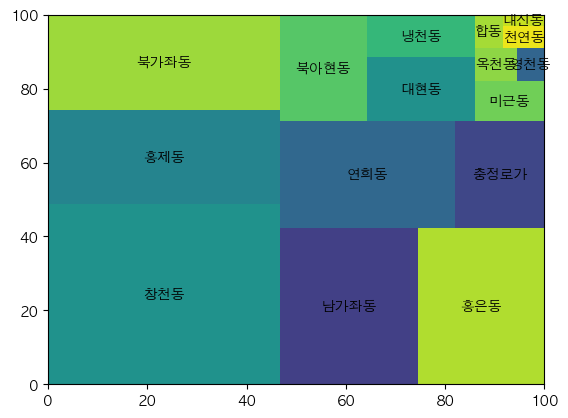

In [28]:
squarify.plot(ck_cnt, label=ck_cnt.index)